# Multiclass Classification of Fetal Health using Cardiotocogram Data

Objective: Build and compare multiple classifiers to classify fetal health from CTG data into Normal (1), Suspect (2), and Pathological (3).

In [5]:
# Setup imports
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

import xgboost as xgb
import lightgbm as lgb

print('Imports ready')

Imports ready


## Load dataset

This cell will try to download the dataset from Kaggle using the Kaggle API. If you don't have Kaggle configured, upload `fetal_health.csv` into the same directory and re-run the cell.

In [6]:
csv_path = './Dataset/fetal_health.csv'

# def try_kaggle_download():
#     try:
#         from kaggle.api.kaggle_api_extended import KaggleApi
#         api = KaggleApi()
#         api.authenticate()
#         api.dataset_download_file('andrewmvd/fetal-health-classification', 'fetal_health.csv', path='.', unzip=True)
#         print('Downloaded fetal_health.csv using Kaggle API')
#         return True
#     except Exception as e:
#         print('Kaggle download failed:', e)
#         return False

# if not os.path.exists(csv_path):
    # try_kaggle_download()
    
# if not os.path.exists(csv_path):
#     print('Dataset not found. Please place fetal_health.csv in the notebook directory and re-run.')
# else:
#     print('Dataset ready at', csv_path)

In [7]:
# Load the CSV
import pandas as pd

df = pd.read_csv('../Dataset/fetal_health.csv')
print('Shape:', df.shape)
df.head()

Shape: (2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Missing values:
 baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode         

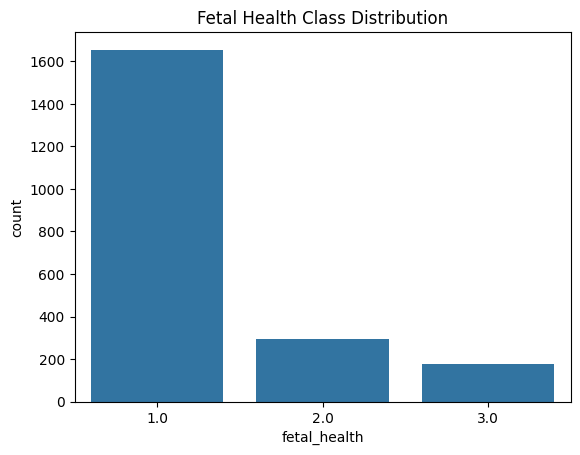

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [8]:
# EDA
print('Missing values:\n', df.isnull().sum())
print('\nDuplicates:', df.duplicated().sum())

print('\nClass distribution:')
print(df['fetal_health'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='fetal_health', data=df)
plt.title('Fetal Health Class Distribution')
plt.show()

df.describe().T

In [9]:
# Preprocessing

df = df.drop_duplicates().reset_index(drop=True)
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

k = 12
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X, y)
cols = selector.get_support(indices=True)
selected_features = X.columns[cols].tolist()
print('Selected features:', selected_features)

X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Selected features: ['baseline value', 'accelerations', 'uterine_contractions', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_min', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance']
Train shape: (1479, 12) Test shape: (634, 12)


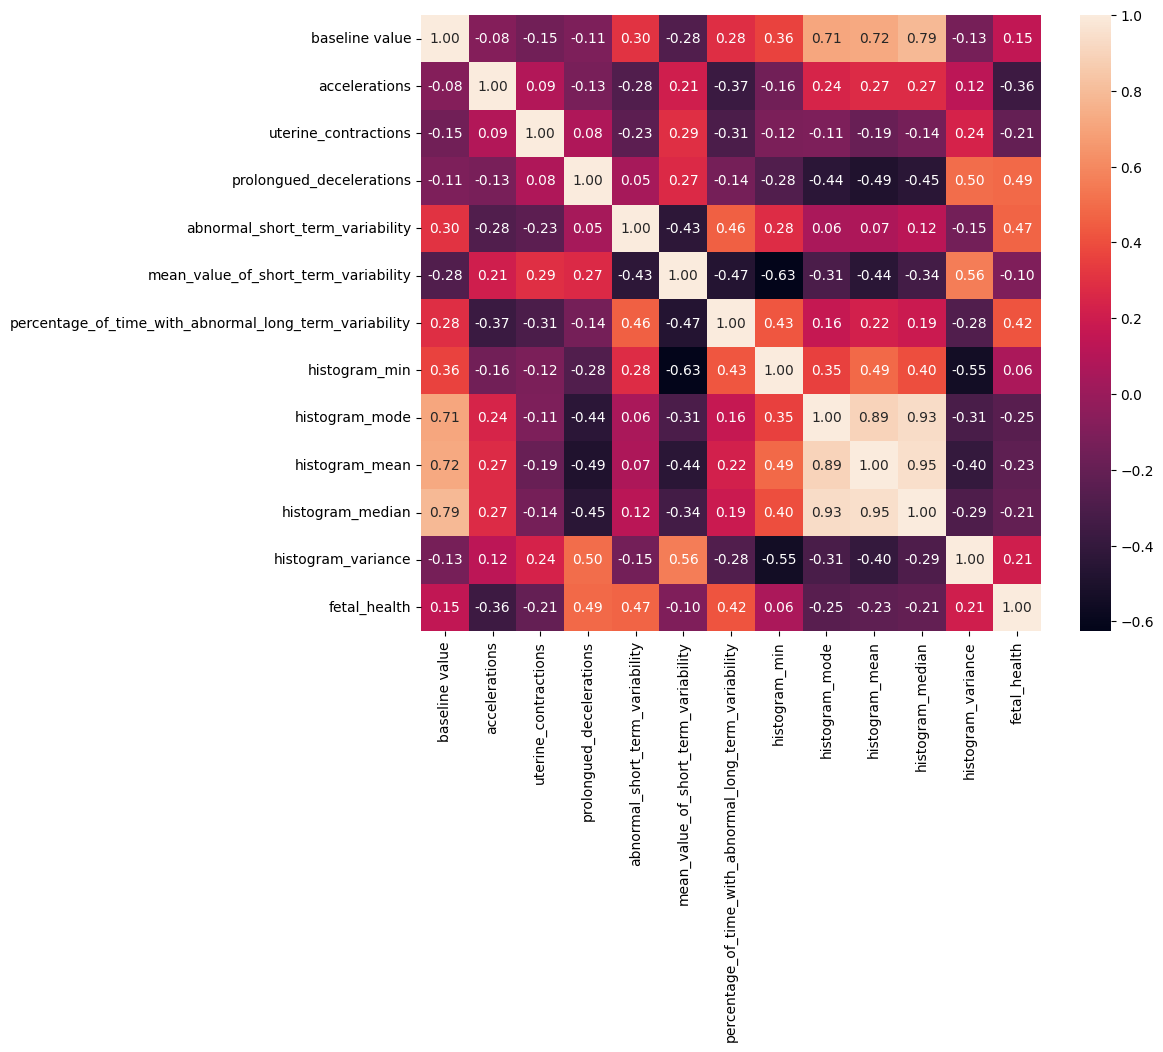

In [10]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([X_selected, y], axis=1).corr(), annot=True, fmt='.2f')
plt.show()


Training Logistic Regression
Logistic Regression accuracy = 0.88801261829653
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       494
           1       0.62      0.62      0.62        88
           2       0.90      0.69      0.78        52

    accuracy                           0.89       634
   macro avg       0.82      0.76      0.78       634
weighted avg       0.89      0.89      0.89       634



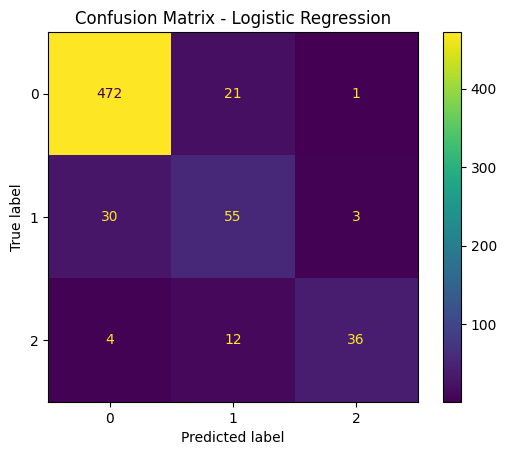


Training Decision Tree
Decision Tree accuracy = 0.9100946372239748
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       494
           1       0.71      0.70      0.71        88
           2       0.94      0.88      0.91        52

    accuracy                           0.91       634
   macro avg       0.86      0.85      0.86       634
weighted avg       0.91      0.91      0.91       634



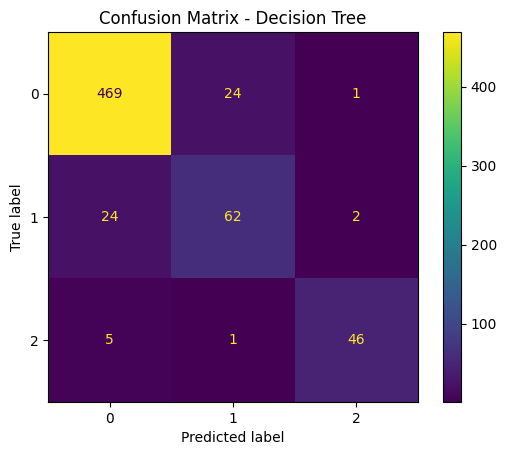


Training Random Forest
Random Forest accuracy = 0.9479495268138801
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       494
           1       0.88      0.74      0.80        88
           2       0.98      0.92      0.95        52

    accuracy                           0.95       634
   macro avg       0.94      0.88      0.91       634
weighted avg       0.95      0.95      0.95       634



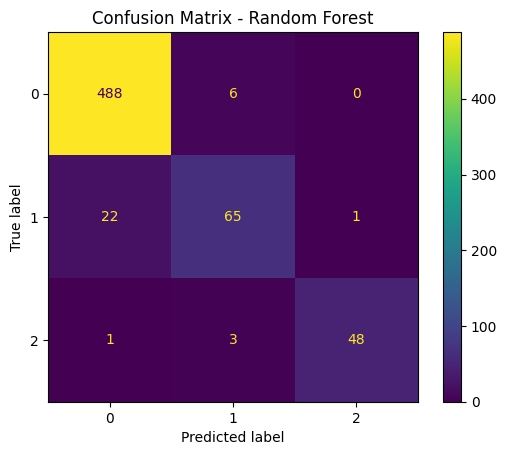


Training KNN
KNN accuracy = 0.8927444794952681
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       494
           1       0.66      0.58      0.62        88
           2       0.91      0.79      0.85        52

    accuracy                           0.89       634
   macro avg       0.83      0.78      0.80       634
weighted avg       0.89      0.89      0.89       634



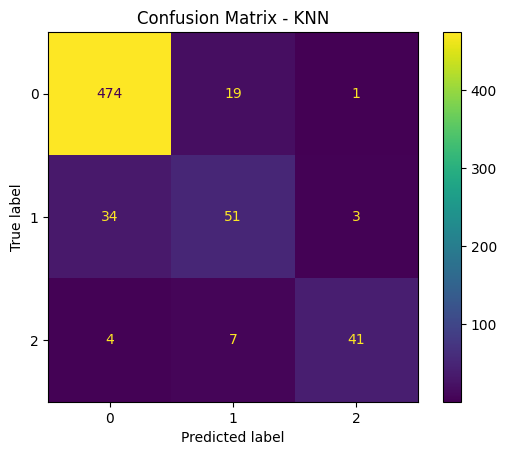


Training SVM (RBF)
SVM (RBF) accuracy = 0.9022082018927445
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       494
           1       0.73      0.59      0.65        88
           2       0.90      0.73      0.81        52

    accuracy                           0.90       634
   macro avg       0.85      0.77      0.80       634
weighted avg       0.90      0.90      0.90       634



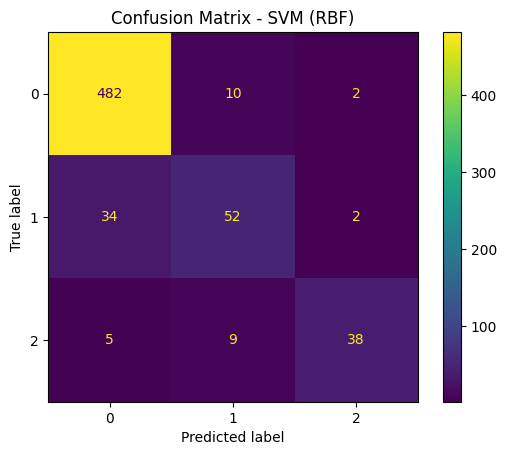


Training Linear SVM
Linear SVM accuracy = 0.8927444794952681
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       494
           1       0.65      0.60      0.63        88
           2       0.90      0.71      0.80        52

    accuracy                           0.89       634
   macro avg       0.83      0.76      0.79       634
weighted avg       0.89      0.89      0.89       634



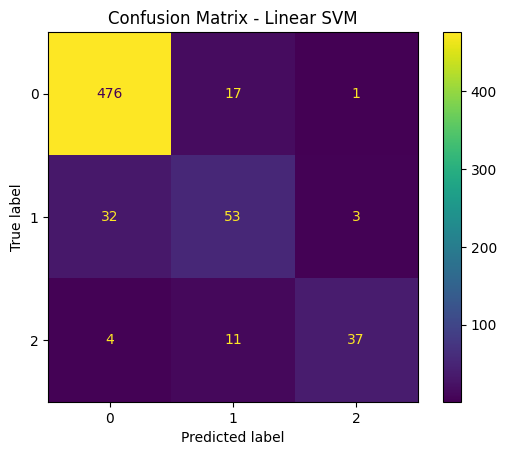


Training MLP
MLP accuracy = 0.9400630914826499
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       494
           1       0.81      0.77      0.79        88
           2       0.94      0.90      0.92        52

    accuracy                           0.94       634
   macro avg       0.90      0.88      0.89       634
weighted avg       0.94      0.94      0.94       634



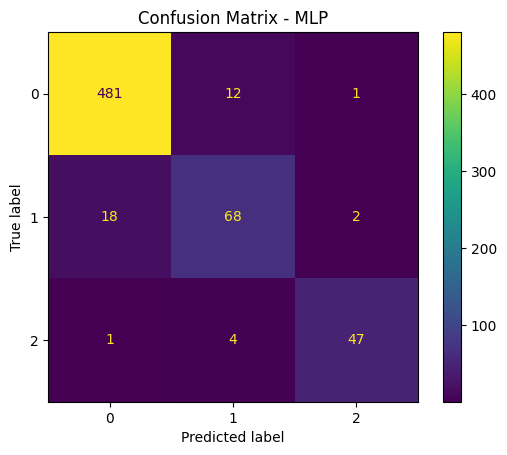


Training Gradient Boosting
Gradient Boosting accuracy = 0.944794952681388
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       494
           1       0.85      0.75      0.80        88
           2       0.98      0.92      0.95        52

    accuracy                           0.94       634
   macro avg       0.93      0.88      0.90       634
weighted avg       0.94      0.94      0.94       634



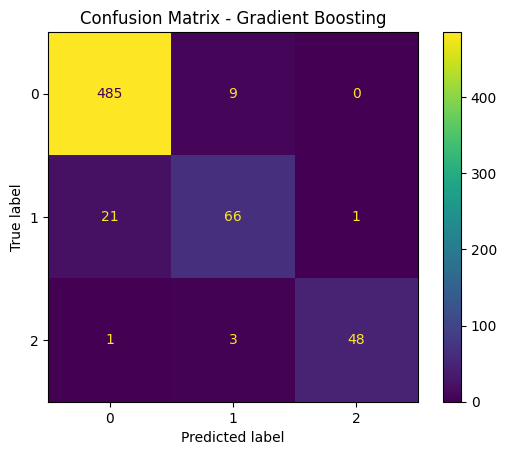


Training XGBoost
XGBoost accuracy = 0.9589905362776026
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       494
           1       0.89      0.81      0.85        88
           2       1.00      0.94      0.97        52

    accuracy                           0.96       634
   macro avg       0.95      0.91      0.93       634
weighted avg       0.96      0.96      0.96       634



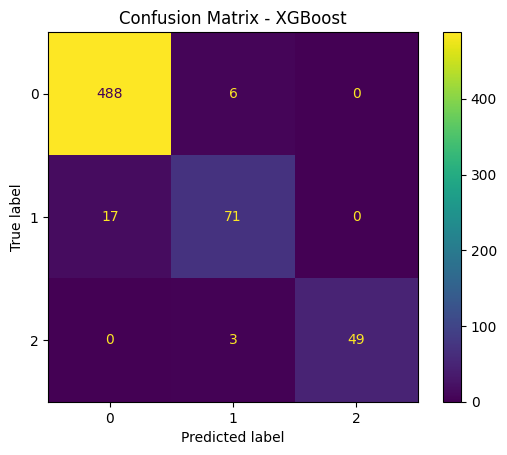


Training LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 1479, number of used features: 12
[LightGBM] [Info] Start training from score -0.249867
[LightGBM] [Info] Start training from score -1.981001
[LightGBM] [Info] Start training from score -2.486937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM accuracy = 0.9605678233438486
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       494
           1   

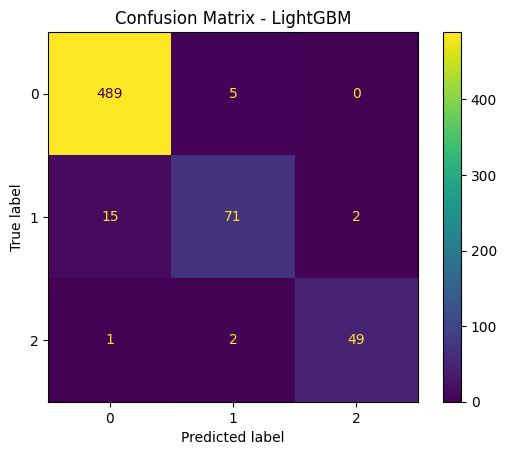

,model,accuracy
9,LightGBM,0.960568
8,XGBoost,0.958991
2,Random Forest,0.947950
7,Gradient Boosting,0.944795
6,MLP,0.940063
1,Decision Tree,0.910095
4,SVM (RBF),0.902208
5,Linear SVM,0.892744
3,KNN,0.892744
0,Logistic Regression,0.888013


In [11]:
# # Train & evaluate multiple models
# from sklearn.metrics import ConfusionMatrixDisplay

# models = [
#     ('Logistic Regression', LogisticRegression(max_iter=1000)),
#     ('Decision Tree', DecisionTreeClassifier(random_state=42)),
#     ('Random Forest', RandomForestClassifier(n_estimators=200, random_state=42)),
#     ('KNN', KNeighborsClassifier(n_neighbors=5)),
#     ('SVM (RBF)', SVC(probability=True)),
#     ('Linear SVM', LinearSVC(max_iter=5000)),
#     ('MLP', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)),
#     ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, random_state=42)),
#     ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
#     ('LightGBM', lgb.LGBMClassifier(random_state=42))
# ]

# results = []
# scaled_models = {'Logistic Regression','KNN','SVM (RBF)','Linear SVM','MLP'}

# for name, model in models:
#     print('\nTraining', name)
#     if name in scaled_models:
#         model.fit(X_train_scaled, y_train)
#         y_pred = model.predict(X_test_scaled)
#     else:
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(name, 'accuracy =', acc)
#     print(classification_report(y_test, y_pred))
#     cm = confusion_matrix(y_test, y_pred)
#     ConfusionMatrixDisplay(cm).plot()
#     plt.title('Confusion Matrix - '+name)
#     plt.show()
#     results.append({'model': name, 'accuracy': acc})

# summary = pd.DataFrame(results).sort_values('accuracy', ascending=False)
# display(summary)



# Train & evaluate multiple models
from sklearn.metrics import ConfusionMatrixDisplay

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('SVM (RBF)', SVC(probability=True)),
    ('Linear SVM', LinearSVC(max_iter=5000)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, random_state=42)),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    ('LightGBM', lgb.LGBMClassifier(random_state=42))
]

# Convert y to 0,1,2
y_train_adj = y_train.astype(int) - 1
y_test_adj = y_test.astype(int) - 1


results = []
scaled_models = {'Logistic Regression','KNN','SVM (RBF)','Linear SVM','MLP'}
for name, model in models:
    print('\nTraining', name)
    if name in scaled_models:
        model.fit(X_train_scaled, y_train_adj)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train_adj)
        y_pred = model.predict(X_test)
    acc = accuracy_score(y_test_adj, y_pred)
    print(name, 'accuracy =', acc)
    print(classification_report(y_test_adj, y_pred))
    cm = confusion_matrix(y_test_adj, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion Matrix - ' + name)
    plt.show()
    results.append({'model': name, 'accuracy': acc})

summary = pd.DataFrame(results).sort_values('accuracy', ascending=False)
display(summary)


Fitting Random Forest


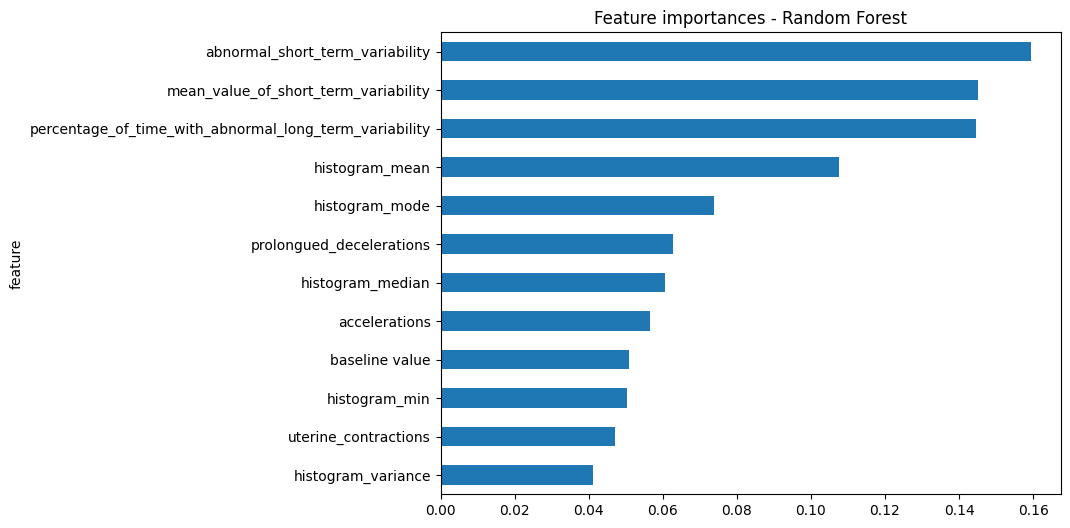

Fitting Gradient Boosting


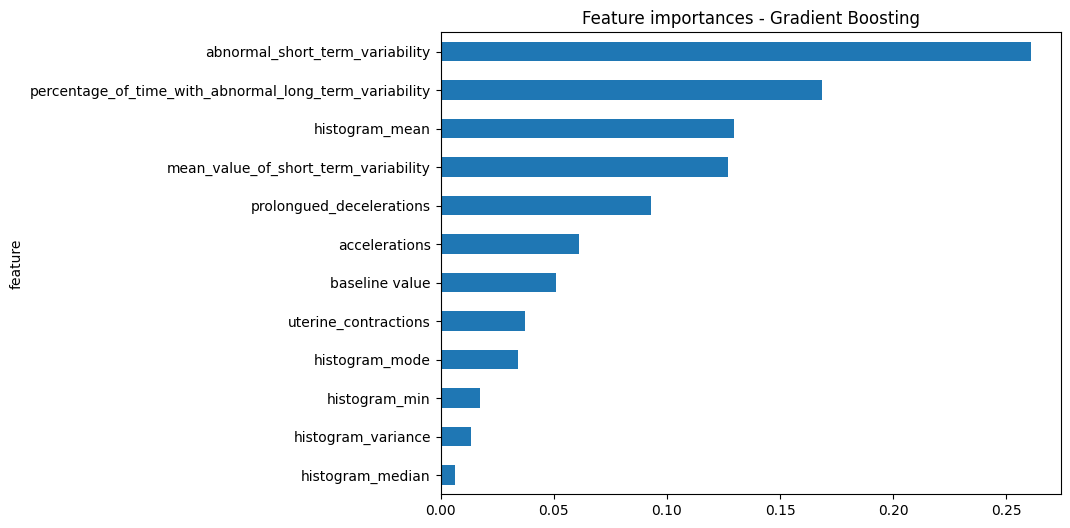

Fitting XGBoost


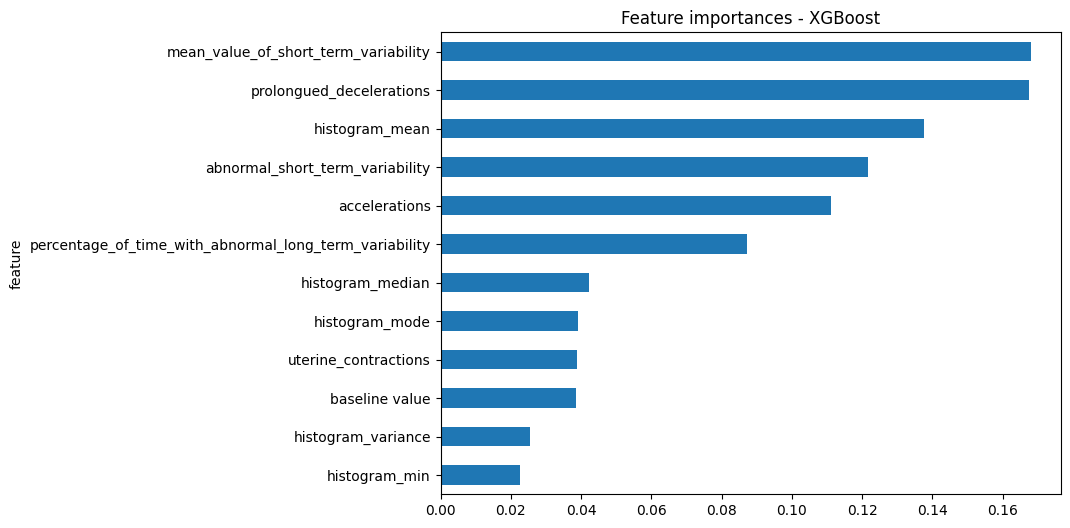

Fitting LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 1479, number of used features: 12
[LightGBM] [Info] Start training from score -0.249867
[LightGBM] [Info] Start training from score -1.981001
[LightGBM] [Info] Start training from score -2.486937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


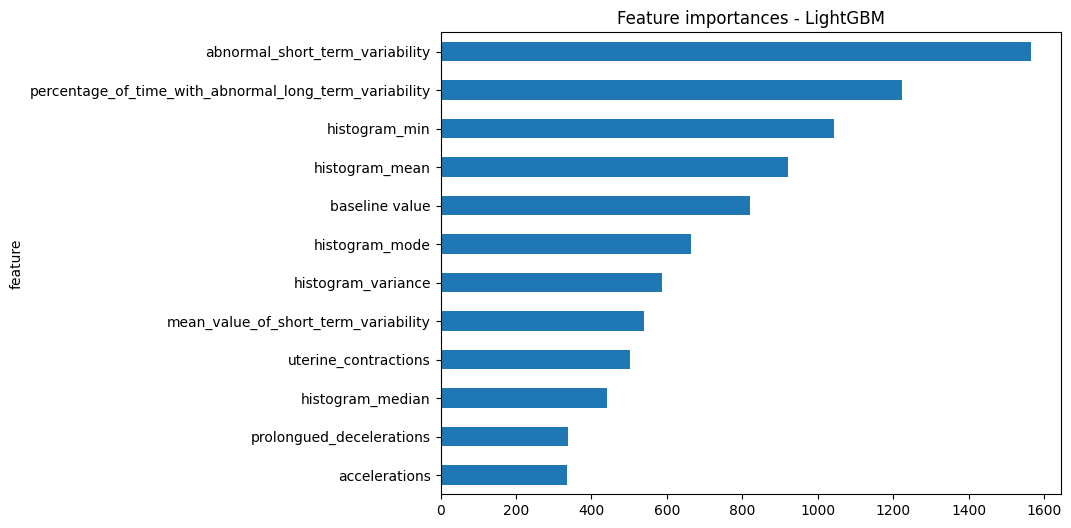

In [13]:
# Feature importances for tree models (use 0-based adjusted labels)
tree_models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

for name, model in tree_models.items():
    print('Fitting', name)
    try:
        model.fit(X_train, y_train_adj)
    except Exception as e:
        print(f'Failed to fit {name}:', e)
        continue

    if hasattr(model, 'feature_importances_'):
        fi = model.feature_importances_
        fi_df = pd.DataFrame({'feature': selected_features, 'importance': fi}).sort_values('importance', ascending=False)
        fi_df.plot.barh(x='feature', y='importance', legend=False, figsize=(8,6))
        plt.title('Feature importances - ' + name)
        plt.gca().invert_yaxis()
        plt.show()
    else:
        print(name, 'does not expose feature_importances_')


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 1479, number of used features: 12
[LightGBM] [Info] Start training from score -0.249867
[LightGBM] [Info] Start training from score -1.981001
[LightGBM] [Info] Start training from score -2.486937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

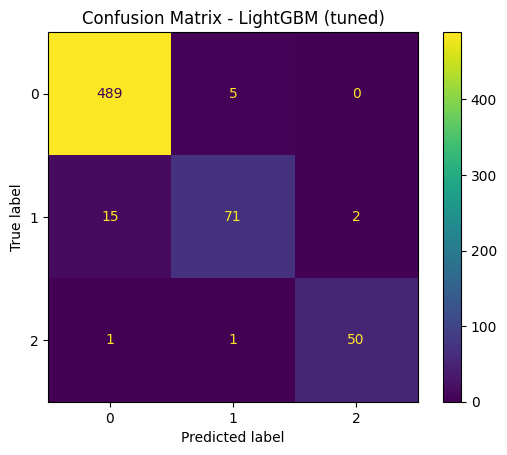

In [14]:
# LightGBM hyperparameter tuning (GridSearchCV)
param_grid = {
    'num_leaves': [31, 50],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01]
}

lgb_clf = lgb.LGBMClassifier(random_state=42)
grid = GridSearchCV(lgb_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print('Best params:', grid.best_params_)
best_lgb = grid.best_estimator_

# Evaluate
if 'LightGBM' in [r['model'] for r in results]:
    print('\nEvaluating tuned LightGBM')
    y_pred = best_lgb.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion Matrix - LightGBM (tuned)')
    plt.show()


## Conclusion

This notebook ran multiple classifiers and shows how to preprocess the CTG dataset, select features, train models, and evaluate them. Next steps: stratified K-Fold CV, class imbalance handling (SMOTE), and more thorough hyperparameter searches.